In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

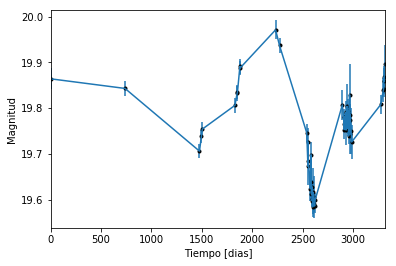

In [2]:
data = np.genfromtxt('LC_18822_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

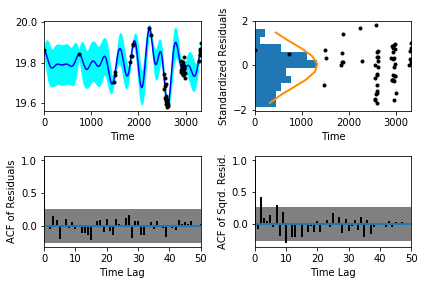

In [5]:
sample.assess_fit()

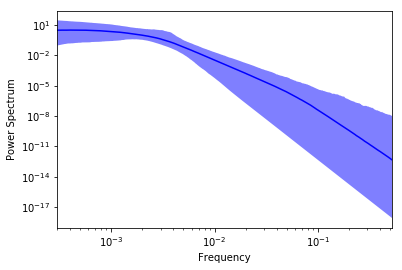

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0594048,'Medida del nivel de ruido')

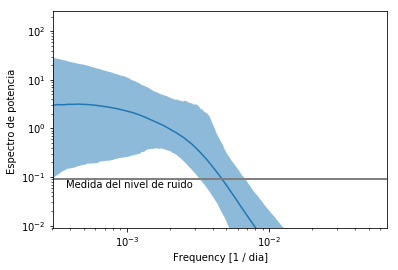

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

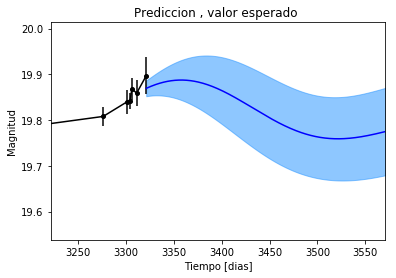

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

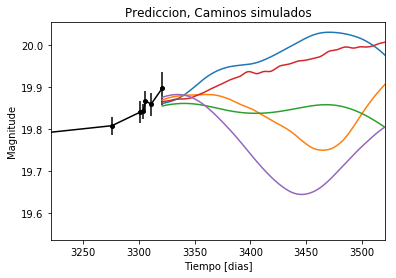

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


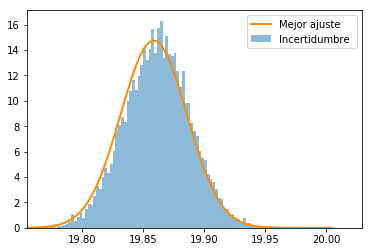

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

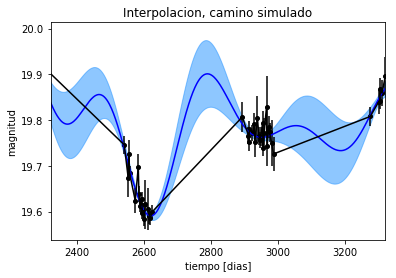

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

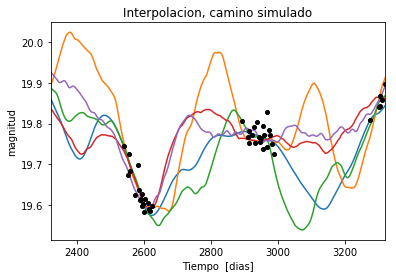

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 591.232464695
Median: 0.00301522781215
Standard deviation: 0.159744654622
68% credibility interval: [ 0.00066863  0.08961307]
95% credibility interval: [  3.58710152e-04   6.29695242e-01]
99% credibility interval: [  3.11139677e-04   9.11165754e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1316.90260191
Median: 0.00156660717643
Standard deviation: 0.0585225513235
68% credibility interval: [ 0.00055493  0.00974504]
95% credibility interval: [ 0.00033843  0.13850656]
99% credibility interval: [  3.08950004e-04   4.33577187e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 840.928594442
Median: 0.00490867552963
Standar

In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 397.639843207
Median: 0.00335086918478
Standard deviation: 0.215660454225
68% credibility interval: [ 0.          0.23112413]
95% credibility interval: [ 0.          0.81707838]
99% credibility interval: [ 0.          0.99671432]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 397.639843207
Median: 0.00335086918478
Standard deviation: 0.215660454225
68% credibility interval: [ 0.          0.23112413]
95% credibility interval: [ 0.          0.81707838]
99% credibility interval: [ 0.          0.99671432]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 325.364492134
Median: 0.0
Standard deviation: 0.000964101410566
68% 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 491.806599438
Median: 139.074904555
Standard deviation: 1.80709433064
68% credibility interval: [ 137.05890272  140.46831992]
95% credibility interval: [ 134.62422596  141.64425993]
99% credibility interval: [ 132.41059944  142.16684463]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 743.633607961
Median: 0.259414034602
Standard deviation: 1.72159387693
68% credibility interval: [ 0.03514683  2.44997718]
95% credibility interval: [ 0.01400989  6.20576376]
99% credibility interval: [ 0.01032069  8.3096529 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 756.604247155
Median: 0.0846076414423
Standard deviation: 7.07271589669
68% credibility interval: [  2.19164774e-03   3.96059708e+00]
95% credibility interval: [  5.

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1661.58638306
Median: 5.64265727126e-33
Standard deviation: 7.69806132772e+108
68% credibility interval: [  8.61342731e-97   4.08608492e+22]
95% credibility interval: [  1.23806944e-139   9.79000002e+078]
99% credibility interval: [  4.25803745e-150   5.40576818e+099]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2973.02898037
Median: 19.8155714195
Standard deviation: 0.0507990225037
68% credibility interval: [ 19.776944    19.85743753]
95% credibility interval: [ 19.7172194   19.92164881]
99% credibility interval: [ 19.66019338  19.99958689]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 397.639843207
Median: 0.00335086918478
Standard deviation: 0.215660454225
68% credibility interval: [ 0.          0.23112413]
95% credibility interval: [ 0.          0.81707838]
99% credibility interval: [ 0.          0.99671432]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 397.639843207
Median: 0.00335086918478
Standard deviation: 0.215660454225
68% credibility interval: [ 0.          0.23112413]
95% credibility interval: [ 0.          0.81707838]
99% credibility interval: [ 0.          0.99671432]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 325.364492134
Median: 0.0
Standard deviation: 0.000964101410566
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 491.806599438
Median: 139.074904555
Standard deviation: 1.80709433064
68% credibility interval: [ 137.05890272  140.46831992]
95% credibility interval: [ 134.62422596  141.64425993]
99% credibility interval: [ 132.41059944  142.16684463]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2502.35641454
Median: 0.0132217125007
Standard deviation: 0.0161812767866
68% credibility interval: [ 0.00805962  0.02598876]
95% credibility interval: [ 0.00510982  0.05427007]
99% credibility interval: [ 0.00392917  0.10422038]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1952.49294894
Median: 0.850414065664
Standard deviation: 0.130496117501
68% credibility interval: [ 0.73743529  0.99100995]
95% credibility interval: [ 0.64824339  1.15547175]
99% credibility interval: [ 0.59906909  1.2703516 ]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1682.66688887
Median: 1.72967351804e-05
Standard deviation: 0.00355966583857
68% credibility interval: [  1.64922743e-27   1.11192808e-03]
95% credibility interval: [  3.55475134e-84   7.72312273e-03]
99% credibility interval: [  1.68257122e-105   1.54349497e-002]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 591.232464695
Median: (-0.0189452350871-0.0227095702556j)
Standard deviation: 1.68628082554
68% credibility interval: [-0.56305554-3.2553772j  -0.00420112-0.01907182j]
95% credibility interval: [ -3.95649189e+00-0.06896979j  -2.25384236e-03-1.04173199j]
99% credibility interval: [ -5.72502328e+00+0.j         -1.95494825e-03-0.1608661j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1316.90260191
Median: (-0.00984328319305+0.0133719647916j)
Standard deviation: 1.40403987076
68% credibility interval: [-0.06122988+0.17593309j -0.00348671+0.01558482j]
95% credibility interval: [-0.87026237+0.92109313j -0.00212641+0.j        ]
99% credibility interval: [ -2.72424581e+00 +3.13031620e+00j  -1.94119013e-03 +7.52611784e-05j]
P